* People often share their feeling on social media platforms like Instgrap, quora, reddit, twitter, post stories, comment or post something in the form of asking for suggestions about their life on subreddits.
* In the past few years, many content creators have come forward to create content to help people with their mental health. 
Many organizations can use stress detection to find which social media users are stressed to help them quickly. 
* We will built a machine learning techniques to detect stress on social media platforms

The dataset I am using for this task contains data posted on subreddits related to mental health.
This dataset contains various mental health problems shared by people about their life. 
this dataset is labelled as 0 and 1, where 0 indicates no stress and 1 indicates stress.

In [1]:
import pandas as pd
import numpy as np


In [2]:
url="https://raw.githubusercontent.com/amankharwal/Website-data/master/stress.csv"
df= pd.read_csv(url)
df.head()

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_pleasantness,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment
0,ptsd,8601tu,"(15, 20)","He said he had not felt that way before, sugge...",33181,1,0.8,1521614353,5,1.806818,...,1.000,1.1250,1.0,1.77000,1.52211,1.89556,0.86,1,3.253573,-0.002742
1,assistance,8lbrx9,"(0, 5)","Hey there r/assistance, Not sure if this is th...",2606,0,1.0,1527009817,4,9.429737,...,1.125,1.0000,1.0,1.69586,1.62045,1.88919,0.65,2,8.828316,0.292857
2,ptsd,9ch1zh,"(15, 20)",My mom then hit me with the newspaper and it s...,38816,1,0.8,1535935605,2,7.769821,...,1.000,1.1429,1.0,1.83088,1.58108,1.85828,0.67,0,7.841667,0.011894
3,relationships,7rorpp,"[5, 10]","until i met my new boyfriend, he is amazing, h...",239,1,0.6,1516429555,0,2.667798,...,1.000,1.1250,1.0,1.75356,1.52114,1.98848,0.50,5,4.104027,0.141671
4,survivorsofabuse,9p2gbc,"[0, 5]",October is Domestic Violence Awareness Month a...,1421,1,0.8,1539809005,24,7.554238,...,1.000,1.1250,1.0,1.77644,1.64872,1.81456,1.00,1,7.910952,-0.204167


The data contain 5 rows and 116 columns

In [3]:
# check if there is null values or not
df.isnull().sum()

subreddit                   0
post_id                     0
sentence_range              0
text                        0
id                          0
                           ..
lex_dal_avg_pleasantness    0
social_upvote_ratio         0
social_num_comments         0
syntax_fk_grade             0
sentiment                   0
Length: 116, dtype: int64

In [4]:
df.columns

Index(['subreddit', 'post_id', 'sentence_range', 'text', 'id', 'label',
       'confidence', 'social_timestamp', 'social_karma', 'syntax_ari',
       ...
       'lex_dal_min_pleasantness', 'lex_dal_min_activation',
       'lex_dal_min_imagery', 'lex_dal_avg_activation', 'lex_dal_avg_imagery',
       'lex_dal_avg_pleasantness', 'social_upvote_ratio',
       'social_num_comments', 'syntax_fk_grade', 'sentiment'],
      dtype='object', length=116)

this dataset does not have any null values. Now let’s prepare the text column of this dataset to clean the text column with stopwords, links, special symbols and language errors:

In [5]:
import nltk
import re

In [6]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mariam\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
stemmer= nltk.SnowballStemmer("english")
stemmer

In [8]:
from nltk.corpus import stopwords
import string

In [9]:
stopword= set(stopwords.words('english'))
stopword

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [11]:
def clean(text):
    text= str(text).lower() #convert text to string format and lower case
    text= re.sub('\[.*?\]', '', text)
    # Remove all URLs from the string
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text=re.sub('<.*?>+', '', text)
    # Remove all punctuation characters from the string
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    # Remove all newline characters from the string
    text = re.sub('\n', '', text)
    # Remove all words that contain numbers from the string
    text = re.sub('\w*\d\w*', '', text)
    text=[word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text=[stemmer for stemmer in text.split(' ')]
    text=" ".join(text)
    return text

In [13]:
df["text"]=df["text"].apply(clean)
df["text"]

0       said felt way suggeted go rest trigger ahead y...
1       hey rassistance sure right place post goes  im...
2       mom hit newspaper shocked would knows dont lik...
3       met new boyfriend amazing kind sweet good stud...
4       october domestic violence awareness month dome...
                              ...                        
2833     week ago precious ignored  jan  happy year pr...
2834    dont ability cope anymore im trying lot things...
2835    case first time youre reading post looking peo...
2836    find normal good relationship main problem see...
2837    talking mom morning said sister trauma worse m...
Name: text, Length: 2838, dtype: object

#Now our text data is cleaned, we removed all unecessary things using clean function

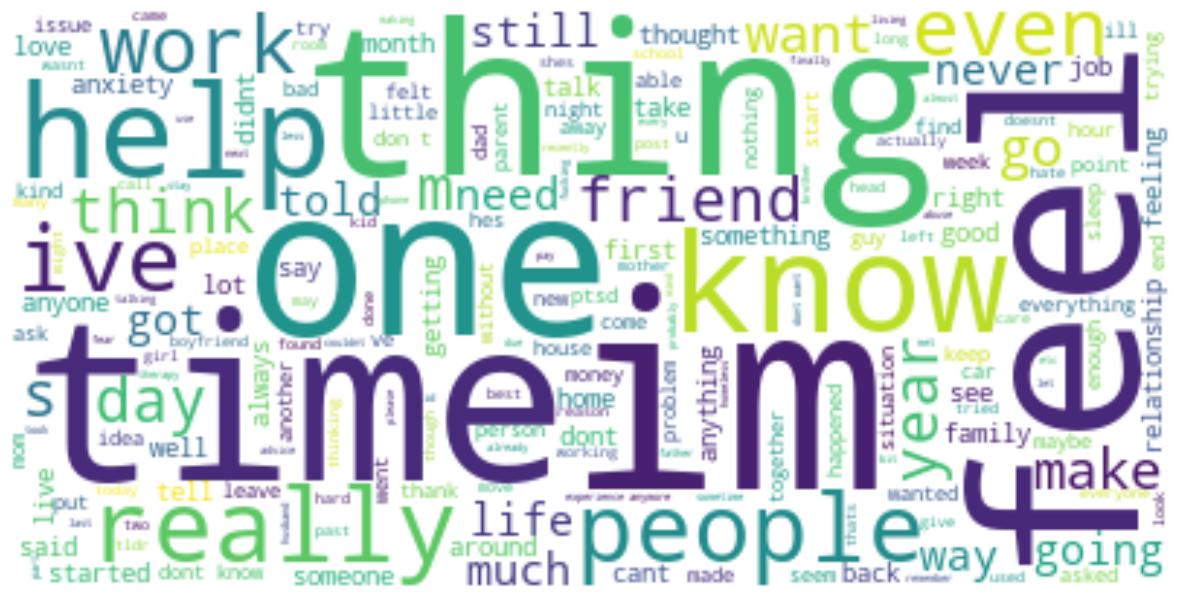

In [16]:
# Now let's look at the most used words shared by people on social media
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
text = " ".join(i for i in df.text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### The most used words are: time, feeling, i am, friend, think, want, people etc

### Stress Detection Model

The label column in this dataset contains labels as 0 and 1. 0 means no stress, and 1 means stress

In [17]:
df["label"]=df["label"].map({0: "No Stress", 1: "Stress"})
df=df[["text", "label"]]
df.head()

,text,label
0,said felt way suggeted go rest trigger ahead y...,Stress
1,hey rassistance sure right place post goes im...,No Stress
2,mom hit newspaper shocked would knows dont lik...,Stress
3,met new boyfriend amazing kind sweet good stud...,Stress
4,october domestic violence awareness month dome...,Stress


In [20]:
# split data
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

count_vec=CountVectorizer()

X= np.array(df["text"])
X=count_vec.fit_transform(X) # convert X text to vector
y=np.array(df["label"])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
X_train.shape

(2270, 11726)

In [23]:
X_train[:5]

<5x11726 sparse matrix of type '<class 'numpy.int64'>'
	with 208 stored elements in Compressed Sparse Row format>

In [24]:
y_train[:5]

array(['Stress', 'Stress', 'Stress', 'No Stress', 'No Stress'],
      dtype=object)

In [41]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.naive_bayes import MultinomialNB
# # Define a TfidfVectorizer for text feature extraction
# tfidf_vectorizer = TfidfVectorizer()

# # Transform the text data into TF-IDF features
# X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
# X_test_tfidf = tfidf_vectorizer.transform(X_test)


In [25]:
# As this is a text binary classification problem, let's use Bernoulli Naive Bayes algorithm
from sklearn.naive_bayes import BernoulliNB
model= BernoulliNB()
model.fit(X_train, y_train)

BernoulliNB()

In [26]:
model.predict(X_test[:5])

array(['No Stress', 'No Stress', 'Stress', 'No Stress', 'No Stress'],
      dtype='<U9')

In [27]:
model.score(X_test, y_test)

0.7693661971830986

In [29]:
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.6954225352112676

In [30]:
from sklearn.svm import SVC
model= SVC()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7130281690140845

In [31]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.7183098591549296

In [83]:
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score

# Define the hyperparameter grid for grid search
param_grid = {
    # Logistic Regression hyperparameters
    'C': [0.01, 0.1, 1.0],
    
    # Random Forest hyperparameters
    'n_estimators': [100, 200, 300],
    
    # Multinomial Naive Bayes hyperparameters
    'alpha': [0.5, 1.0, 1.5],
    'alpha': [0.2, 0.5, 1]
}

# Create models
logistic_regression = LogisticRegression()
random_forest = RandomForestClassifier()
multinomial_nb = MultinomialNB()
bernoulli_naive_bayes= BernoulliNB()

# Create a dictionary of models
models = {
    'logistic_regression': (logistic_regression, 'C'),
    'random_forest': (random_forest, 'n_estimators'),
    'multinomial_naive_bayes': (multinomial_nb, 'alpha'),
    'bernoulli_naive_bayes': (bernoulli_naive_bayes, 'alpha')
}

# Perform grid search for each model
for model_name, (model, param_name) in models.items():
    grid_search = GridSearchCV(model, {param_name: param_grid[param_name]}, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    
    best_param = grid_search.best_params_[param_name]
    best_model = grid_search.best_estimator_
    
    # Evaluate the best model on the test set
    y_pred = best_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    print(f"Model: {model_name}, Best {param_name}: {best_param}, Test Set Accuracy: {accuracy}")

Model: logistic_regression, Best C: 0.1, Test Set Accuracy: 0.7200704225352113
Model: random_forest, Best n_estimators: 200, Test Set Accuracy: 0.7130281690140845
Model: multinomial_naive_bayes, Best alpha: 0.5, Test Set Accuracy: 0.7535211267605634
Model: bernoulli_naive_bayes, Best alpha: 0.5, Test Set Accuracy: 0.7676056338028169


#### The best model for this problem is Bernoulli Naive bayes

In [ ]:
# best_model = grid_search.best_estimator_
# y_pred = best_model.predict(X_test)
# accuracy = accuracy_score(y_test, y_pred)
# print("Test Set Accuracy:", accuracy)

In [81]:
user= input("Enter a text: ")
data= count_vec.transform([user]).toarray()
print(best_model.predict(data))

Enter a text: i 'am really happy with my friends
['No Stress']
